## Feature Selection

<b>Filter Methods</b>
- Correlation with Target and Other Features
- Univariate Selection with Sci-Kit Learn

<b>Wrapper Methods</b>
- Recursive Feature Elimination

<b>Embedded Methods</b>
- Feature Importance
- L1 Regularization

In [4]:
#imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

# scikit-learn modules for feature selection and model evaluation
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE, SelectKBest, SelectFromModel, chi2, f_classif
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score, precision_score, recall_score, f1_score
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelBinarizer
from sklearn import preprocessing

## Load data

In [5]:
df = pd.read_csv ('census.csv')

#### Convert String to numeric classes

In [6]:
df_selection = df.copy()

In [7]:
df_selection.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
label             object
dtype: object

In [8]:
# Categorical columns
cat_columns = ['workclass', 'education', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country', 'label']
num_columns = ['age', 'fnlwgt', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']

**Process categories into numeric with LabelEncoder** (other options available)

In [12]:
for cat in cat_columns:
    le = preprocessing.LabelEncoder()
    le.fit(df_selection[cat])
    df_selection[cat] = le.transform(df_selection[cat])

In [13]:
df_selection.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,label
0,39,7,77516,9,13,4,1,1,4,1,2174,0,40,39,0
1,50,6,83311,9,13,2,4,0,4,1,0,0,13,39,0
2,38,4,215646,11,9,0,6,1,4,1,0,0,40,39,0
3,53,4,234721,1,7,2,6,0,2,1,0,0,40,39,0
4,28,4,338409,9,13,2,10,5,2,0,0,0,40,5,0


Optional Scaling of Numeric features

In [14]:
df_num = df_selection[num_columns].copy()
df_cat = df_selection[cat_columns].copy()
scaler = StandardScaler().fit(df_num[num_columns])
X_scaled = scaler.transform(df_num[num_columns])
X_scaled = pd.DataFrame(X_scaled, columns=num_columns)
df_selection = pd.concat([X_scaled, df_cat], axis=1)

In [15]:
df_selection.head()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,workclass,education,marital-status,occupation,relationship,race,sex,native-country,label
0,0.030671,-1.063611,1.134739,0.148453,-0.21666,-0.035429,7,9,4,1,1,4,1,39,0
1,0.837109,-1.008707,1.134739,-0.145920,-0.21666,-2.222153,6,9,2,4,0,4,1,39,0
2,-0.042642,0.245079,-0.420060,-0.145920,-0.21666,-0.035429,4,11,0,6,1,4,1,39,0
3,1.057047,0.425801,-1.197459,-0.145920,-0.21666,-0.035429,4,1,2,6,0,2,1,39,0
4,-0.775768,1.408176,1.134739,-0.145920,-0.21666,-0.035429,4,9,2,10,5,2,0,5,0


#### Correlation

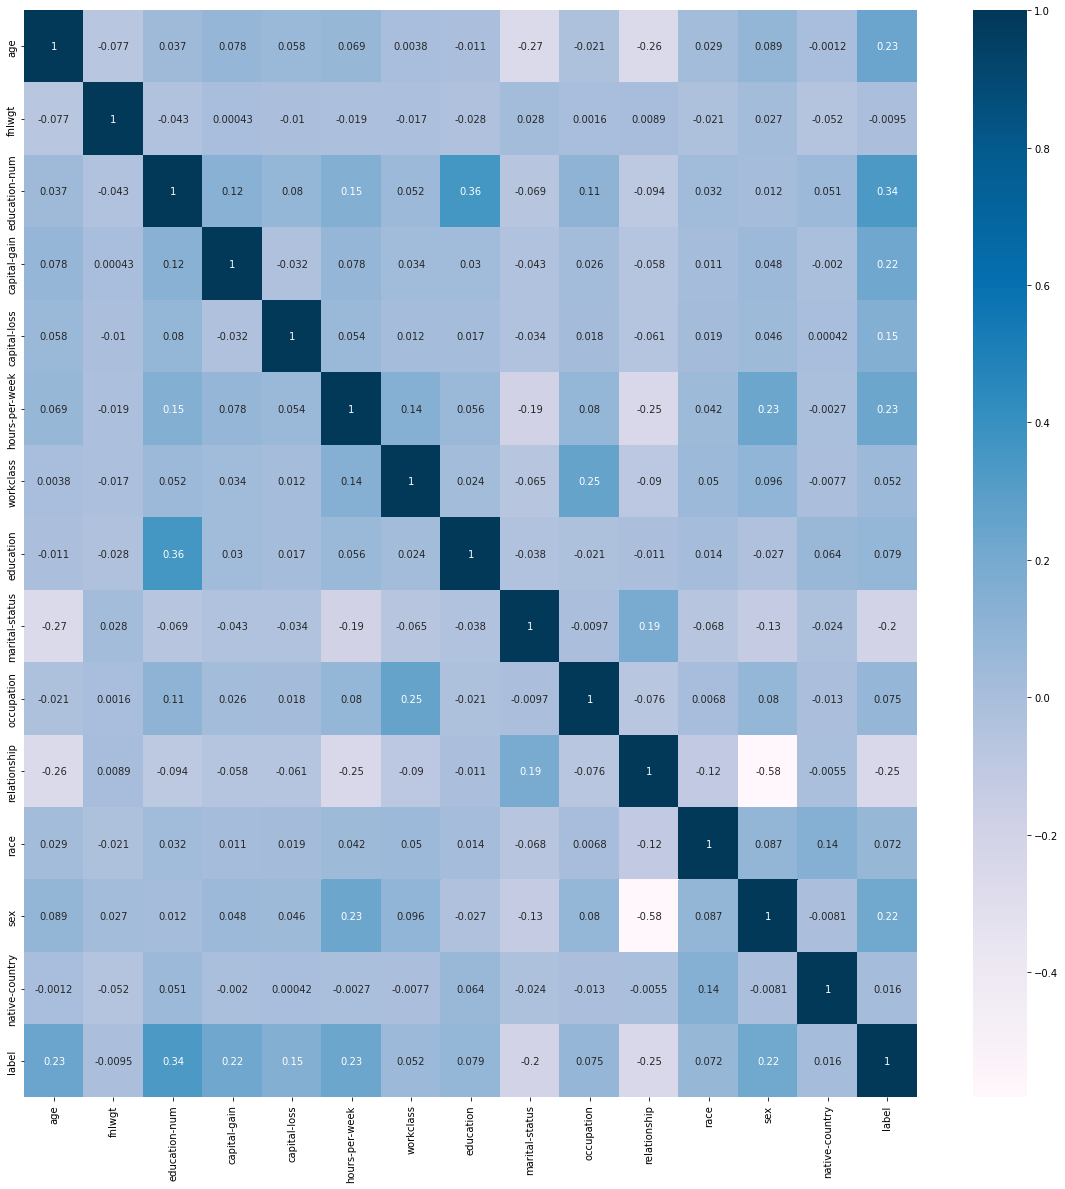

In [16]:
# Set figure size
plt.figure(figsize=(20,20))

# Calculate correlation matrix
cor = df_selection.corr() 

# Plot the correlation matrix
sns.heatmap(cor, annot=True, cmap=plt.cm.PuBu)
plt.show()

In [17]:
cor

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,workclass,education,marital-status,occupation,relationship,race,sex,native-country,label
age,1.000000,-0.076646,0.036527,0.077674,0.057775,0.068756,0.003787,-0.010508,-0.266288,-0.020947,-0.263698,0.028718,0.088832,-0.001151,0.234037
fnlwgt,-0.076646,1.000000,-0.043195,0.000432,-0.010252,-0.018768,-0.016656,-0.028145,0.028153,0.001597,0.008931,-0.021291,0.026858,-0.051966,-0.009463
education-num,0.036527,-0.043195,1.000000,0.122630,0.079923,0.148123,0.052085,0.359153,-0.069304,0.109697,-0.094153,0.031838,0.012280,0.050840,0.335154
capital-gain,0.077674,0.000432,0.122630,1.000000,-0.031615,0.078409,0.033835,0.030046,-0.043393,0.025505,-0.057919,0.011145,0.048480,-0.001982,0.223329
capital-loss,0.057775,-0.010252,0.079923,-0.031615,1.000000,0.054256,0.012216,0.016746,-0.034187,0.017987,-0.061062,0.018899,0.045567,0.000419,0.150526
hours-per-week,0.068756,-0.018768,0.148123,0.078409,0.054256,1.000000,0.138962,0.055510,-0.190519,0.080383,-0.248974,0.041910,0.229309,-0.002671,0.229689
workclass,0.003787,-0.016656,0.052085,0.033835,0.012216,0.138962,1.000000,0.023513,-0.064731,0.254892,-0.090461,0.049742,0.095981,-0.007690,0.051604
education,-0.010508,-0.028145,0.359153,0.030046,0.016746,0.055510,0.023513,1.000000,-0.038407,-0.021260,-0.010876,0.014131,-0.027356,0.064288,0.079317
marital-status,-0.266288,0.028153,-0.069304,-0.043393,-0.034187,-0.190519,-0.064731,-0.038407,1.000000,-0.009654,0.185451,-0.068013,-0.129314,-0.023819,-0.199307
occupation,-0.020947,0.001597,0.109697,0.025505,0.017987,0.080383,0.254892,-0.021260,-0.009654,1.000000,-0.075607,0.006763,0.080296,-0.012543,0.075468


#### Correlation with Target Value

In [18]:
# Get the absolute value of the correlation
cor_target = abs(cor["label"])

# Select highly correlated features (thresold = 0.2)
relevant_features = cor_target[cor_target>0.2]

# Collect the names of the features
names = [index for index, value in relevant_features.iteritems()]

# Drop the target variable from the results
names.remove('label')

# Display the results
print(names)

['age', 'education-num', 'capital-gain', 'hours-per-week', 'relationship', 'sex']


#### Correlation with Other Features

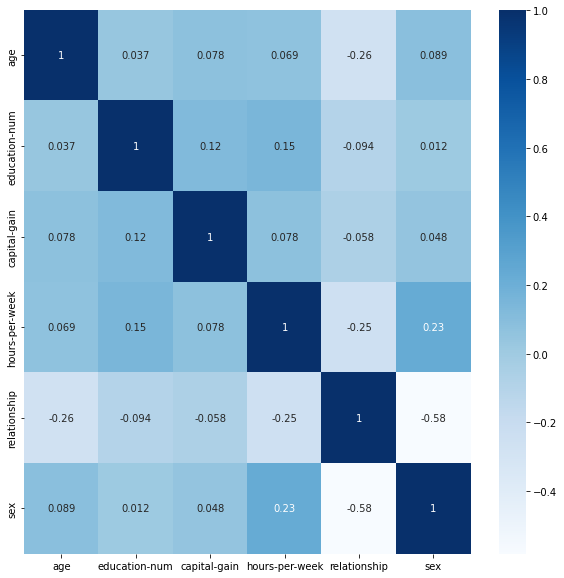

In [19]:
# Set figure size
plt.figure(figsize=(10,10))

# Calculate the correlation matrix for target relevant features that you previously determined
new_corr = df_selection[names].corr()

# Visualize the correlation matrix
sns.heatmap(new_corr, annot=True, cmap=plt.cm.Blues)
plt.show()

#### SelectKBest

In [20]:
df_selection.dtypes

age               float64
fnlwgt            float64
education-num     float64
capital-gain      float64
capital-loss      float64
hours-per-week    float64
workclass           int64
education           int64
marital-status      int64
occupation          int64
relationship        int64
race                int64
sex                 int64
native-country      int64
label               int64
dtype: object

In [21]:
# Set the target values
y = df_selection['label'].values

df_no_label = df_selection.copy()
df_no_label = df_no_label.drop(columns=["label"])
    
# Set the input values
X = df_no_label.values

In [22]:
df_no_label.head()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,workclass,education,marital-status,occupation,relationship,race,sex,native-country
0,0.030671,-1.063611,1.134739,0.148453,-0.21666,-0.035429,7,9,4,1,1,4,1,39
1,0.837109,-1.008707,1.134739,-0.145920,-0.21666,-2.222153,6,9,2,4,0,4,1,39
2,-0.042642,0.245079,-0.420060,-0.145920,-0.21666,-0.035429,4,11,0,6,1,4,1,39
3,1.057047,0.425801,-1.197459,-0.145920,-0.21666,-0.035429,4,1,2,6,0,2,1,39
4,-0.775768,1.408176,1.134739,-0.145920,-0.21666,-0.035429,4,9,2,10,5,2,0,5


In [24]:
### START CODE HERE ###

# Create SelectKBest object using f_classif (ANOVA statistics) (Other Score functions available)
select_k_best = SelectKBest(score_func=f_classif, k=6)

# Fit and transform the input data using select_k_best
X_new = select_k_best.fit_transform(X,y)

# Extract the features which are selected using get_support API
features_mask = select_k_best.get_support()

### END CODE HERE ###

# Print the results
reqd_cols = pd.DataFrame({'Columns': df_no_label.columns, 'Retain': features_mask})
print(reqd_cols)

           Columns  Retain
0              age    True
1           fnlwgt   False
2    education-num    True
3     capital-gain    True
4     capital-loss   False
5   hours-per-week    True
6        workclass   False
7        education   False
8   marital-status   False
9       occupation   False
10    relationship    True
11            race   False
12             sex    True
13  native-country   False


In [26]:
# Get the feature names from SelectKBest
feature_names = list(df_no_label.columns[features_mask])

label_column = ["label"]

# Append the categorical and label columns
feature_names = feature_names + label_column

# Select the selected subset of columns
df_select = df[feature_names]

# Write CSV to the created directory
#df_select.to_csv(_data_root + 'selected_df.csv' , index=False)

# Preview the results
df_select.head()

,age,education-num,capital-gain,hours-per-week,relationship,sex,label
0,39,13,2174,40,Not-in-family,Male,<=50K
1,50,13,0,13,Husband,Male,<=50K
2,38,9,0,40,Not-in-family,Male,<=50K
3,53,7,0,40,Husband,Male,<=50K
4,28,13,0,40,Wife,Female,<=50K


## Wrapper Methods

Wrapper methods use a model to measure the effectiveness of a particular subset of features. As mentioned in class, one approach is to remove or add features sequentially. You can either start with 1 feature and gradually add until no improvement is made (forward selection), or do the reverse (backward selection). That can be done with the SequentialFeatureSelector class which uses k-fold cross validation scores to decide which features to add or remove. Recursive Feature Elimination is similar to backwards elimination but uses feature importance scores to prune the number of features. You can also specify how many features to remove at each iteration of the recursion. Let's use this as the wrapper for our model below.

### Recursive Feature Elimination


You used the RandomForestClassifier as the model algorithm for which features should be selected. Now, you will use Recursive Feature Elimination, which wraps around the selected model to perform feature selection. This time, you can repeat the same task of selecting the top 20 features using RFE instead of SelectKBest.

In [27]:
df_selection.head()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,workclass,education,marital-status,occupation,relationship,race,sex,native-country,label
0,0.030671,-1.063611,1.134739,0.148453,-0.21666,-0.035429,7,9,4,1,1,4,1,39,0
1,0.837109,-1.008707,1.134739,-0.145920,-0.21666,-2.222153,6,9,2,4,0,4,1,39,0
2,-0.042642,0.245079,-0.420060,-0.145920,-0.21666,-0.035429,4,11,0,6,1,4,1,39,0
3,1.057047,0.425801,-1.197459,-0.145920,-0.21666,-0.035429,4,1,2,6,0,2,1,39,0
4,-0.775768,1.408176,1.134739,-0.145920,-0.21666,-0.035429,4,9,2,10,5,2,0,5,0


In [28]:
# Split feature and target vectors
X = df_selection.drop(columns=["label"])
Y = df_selection["label"]

In [29]:
def run_rfe():
    # Split train and test sets
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, stratify=Y, random_state = 123)

    
    # Define the model
    model = RandomForestClassifier(criterion='entropy', random_state=47)
    
    # Wrap RFE around the model
    rfe = RFE(model, n_features_to_select=5, step=1)
    
    # Fit RFE
    rfe = rfe.fit(X_train, Y_train)
    feature_names = df_selection.drop("label",1 ).columns[rfe.get_support()]
    
    return feature_names

rfe_feature_names = run_rfe()

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:14: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  


In [30]:
rfe_feature_names

Index(['age', 'fnlwgt', 'education-num', 'capital-gain', 'relationship'], dtype='object')

## Embedded Methods

Some models already have intrinsic properties that select the best features when it is constructed. With that, you can simply access these properties to get the scores for each feature. Let's look at some examples in the following sections.

**Feature importance** is already built-in in scikit-learn’s tree based models like **RandomForestClassifier**. Once the model is fit, the feature importance is available as a property named **feature_importances_**.

You can use [SelectFromModel](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectFromModel.html) to select features from the trained model based on a given threshold.

In [31]:
# Split feature and target vectors
X = df_selection.drop(columns=["label"])
Y = df_selection["label"]

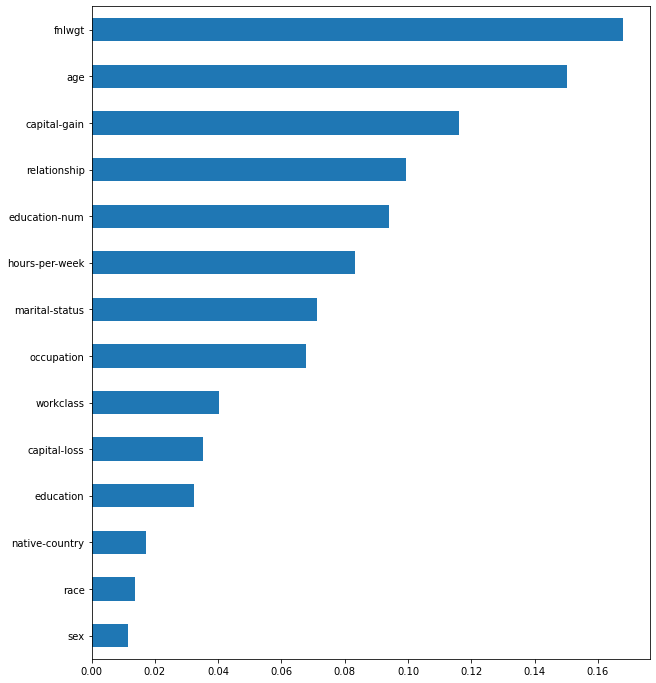

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:27: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only


Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'native-country'],
      dtype='object')

In [32]:
def feature_importances_from_tree_based_model_():
    
    # Split train and test set
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, stratify=Y, random_state = 123)
    
    # Define the model to use
    #scaler = StandardScaler().fit(X_train)
    #X_train_scaled = scaler.transform(X_train)
    #X_test_scaled = scaler.transform(X_test)
    
    model = RandomForestClassifier()
    model = model.fit(X_train, Y_train)
    
    # Plot feature importance
    plt.figure(figsize=(10, 12))
    feat_importances = pd.Series(model.feature_importances_, index=X.columns)
    feat_importances.sort_values(ascending=True).plot(kind='barh')
    plt.show()
    
    return model


def select_features_from_model(model):
    
    model = SelectFromModel(model, prefit=True, threshold=0.013)
    feature_idx = model.get_support()
    feature_names = df.drop("label",1 ).columns[feature_idx]
        
    return feature_names

model = feature_importances_from_tree_based_model_()
feature_imp_feature_names = select_features_from_model(model)
feature_imp_feature_names

### L1 Regularization

L1 or Lasso Regulartization introduces a penalty term to the loss function which leads to the least important features being eliminated. Implementation in scikit-learn can be done with a [LinearSVC](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectFromModel.html) model as the learning algorithm. You can then use [SelectFromModel](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectFromModel.html) to select features based on the LinearSVC model’s output of L1 regularization. 

In [33]:
# Split feature and target vectors
X = df_selection.drop(columns=["label"])
Y = df_selection["label"]

In [34]:
def run_l1_regularization():
    
    # Split train and test set
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2,stratify=Y, random_state = 123)
    
    
    # Select L1 regulated features from LinearSVC output 
    selection = SelectFromModel(LinearSVC(C=1, penalty='l1', dual=False))
    selection.fit(X_train, Y_train)

    feature_names = df.drop("label",1 ).columns[(selection.get_support())]
    
    return feature_names

l1reg_feature_names = run_l1_regularization()
l1reg_feature_names

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:11: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  # This is added back by InteractiveShellApp.init_path()


Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')